# Linear Regression

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt

In [17]:
df = sns.load_dataset('penguins')

In [18]:
ade = df[df['species']=='Gentoo']

<AxesSubplot: xlabel='flipper_length_mm', ylabel='body_mass_g'>

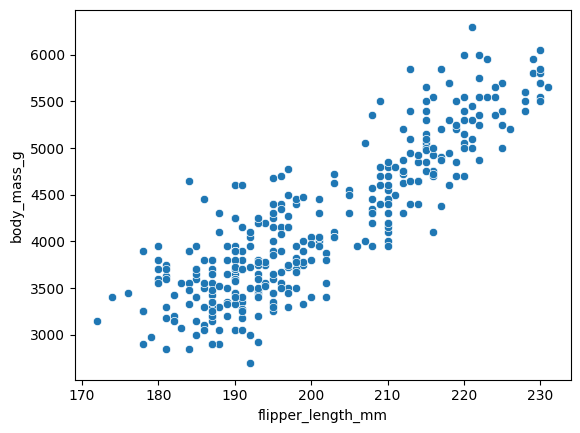

In [19]:
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g')

In [73]:
df.dropna(inplace=True)

In [74]:
from statsmodels.regression.linear_model import OLS
from statsmodels import api as sm

In [81]:
X = df["flipper_length_mm"]
X = sm.add_constant(X)
y = df["body_mass_g"]
model = OLS(y, X).fit()

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          3.13e-105
Time:                        11:26:38   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
xpred = [0, 200]
xpred = sm.add_constant(xpred)
ypred = model.predict(xpred)

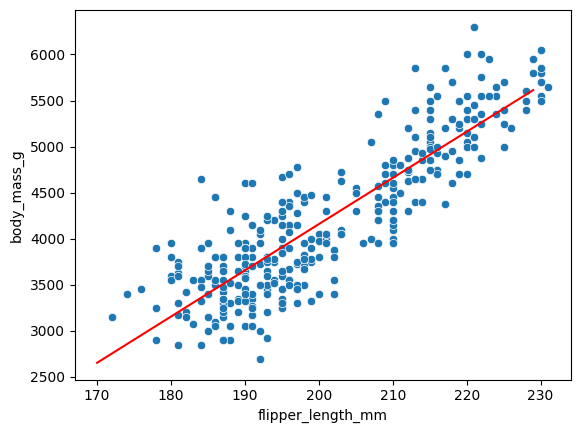

In [71]:
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g')
plt.plot(x, yline, color="red")

In [84]:
ypred = model.predict(X)
diff = y - ypred

0      544.351547
1      343.585218
2     -657.794176
4     -357.487644
5       -7.027846
          ...    
338     64.293771
340    -60.859495
341    488.067644
342    439.600303
343    589.447037
Length: 333, dtype: float64

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

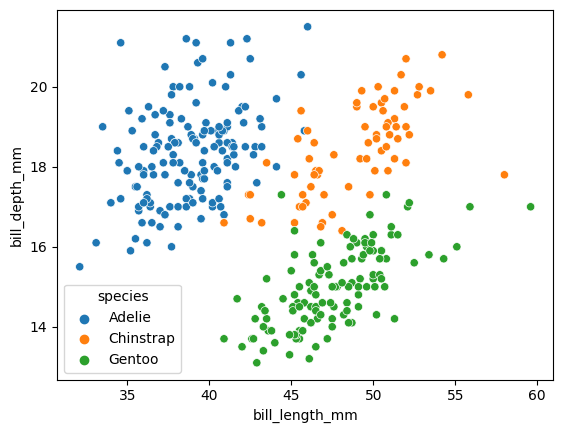

In [86]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue="species")

In [90]:
a.groupby('dataset').agg(['mean', 'std'])

x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579

In [92]:
a.to_csv('anscombe.csv', index=False)

In [103]:
import pandas as pd

binary = pd.get_dummies(df['species'])
df2 = pd.concat([df, binary], axis=1)

In [104]:
df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,0
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0,0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0,0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0,0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0,0,1


/tmp/ipykernel_283547/1738403036.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


<AxesSubplot: >

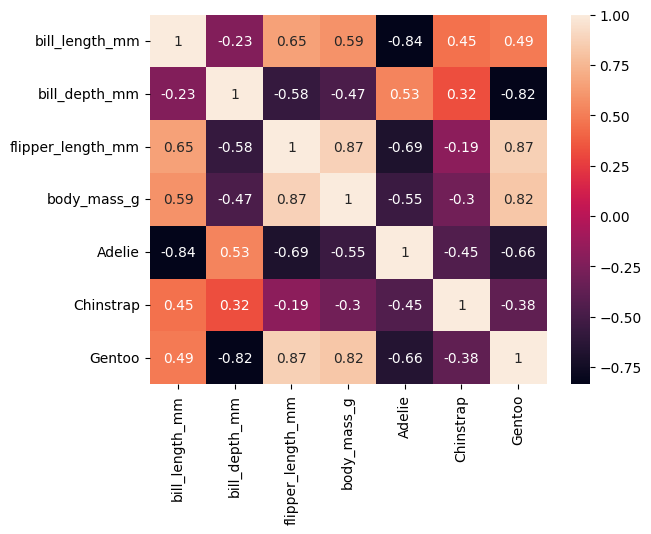

In [106]:
sns.heatmap(df2.corr(), annot=True)

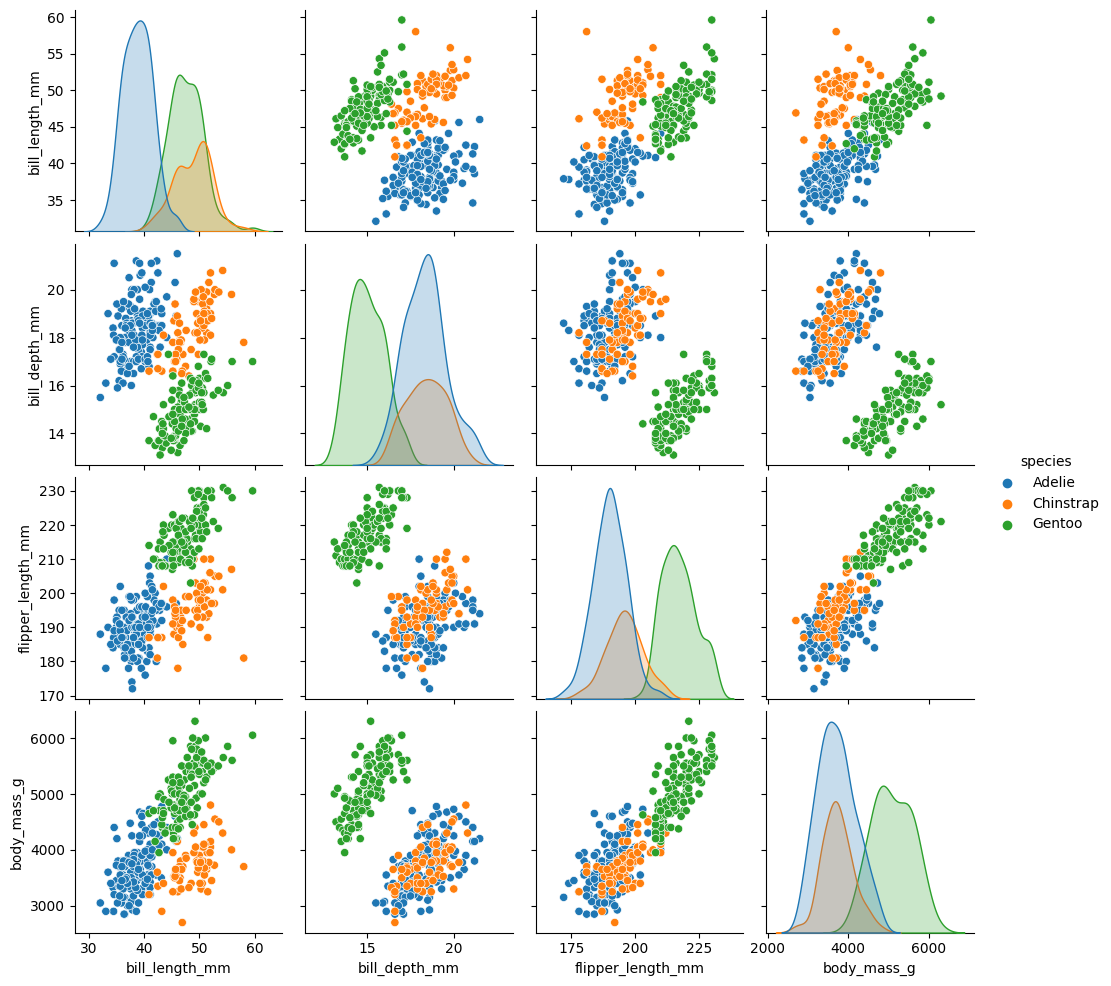

In [108]:
sns.pairplot(df, hue="species")